In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('../apartment/train.csv')
#train.info()

In [3]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

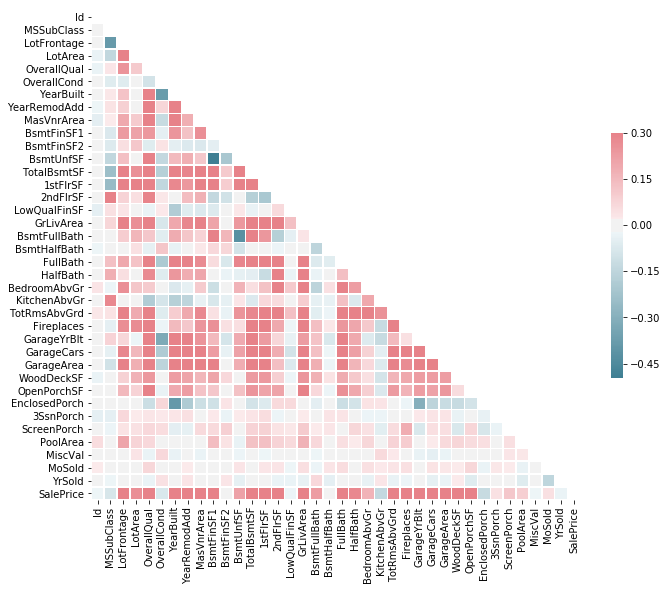

In [3]:
from sklearn import preprocessing
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
from sklearn import preprocessing

catagorical_cols=[]
for column in train.columns.values:
    if (train[column].dtype=='O'):
        catagorical_cols.append(column)


for x in catagorical_cols:
    train[x]=train[x].fillna('None')

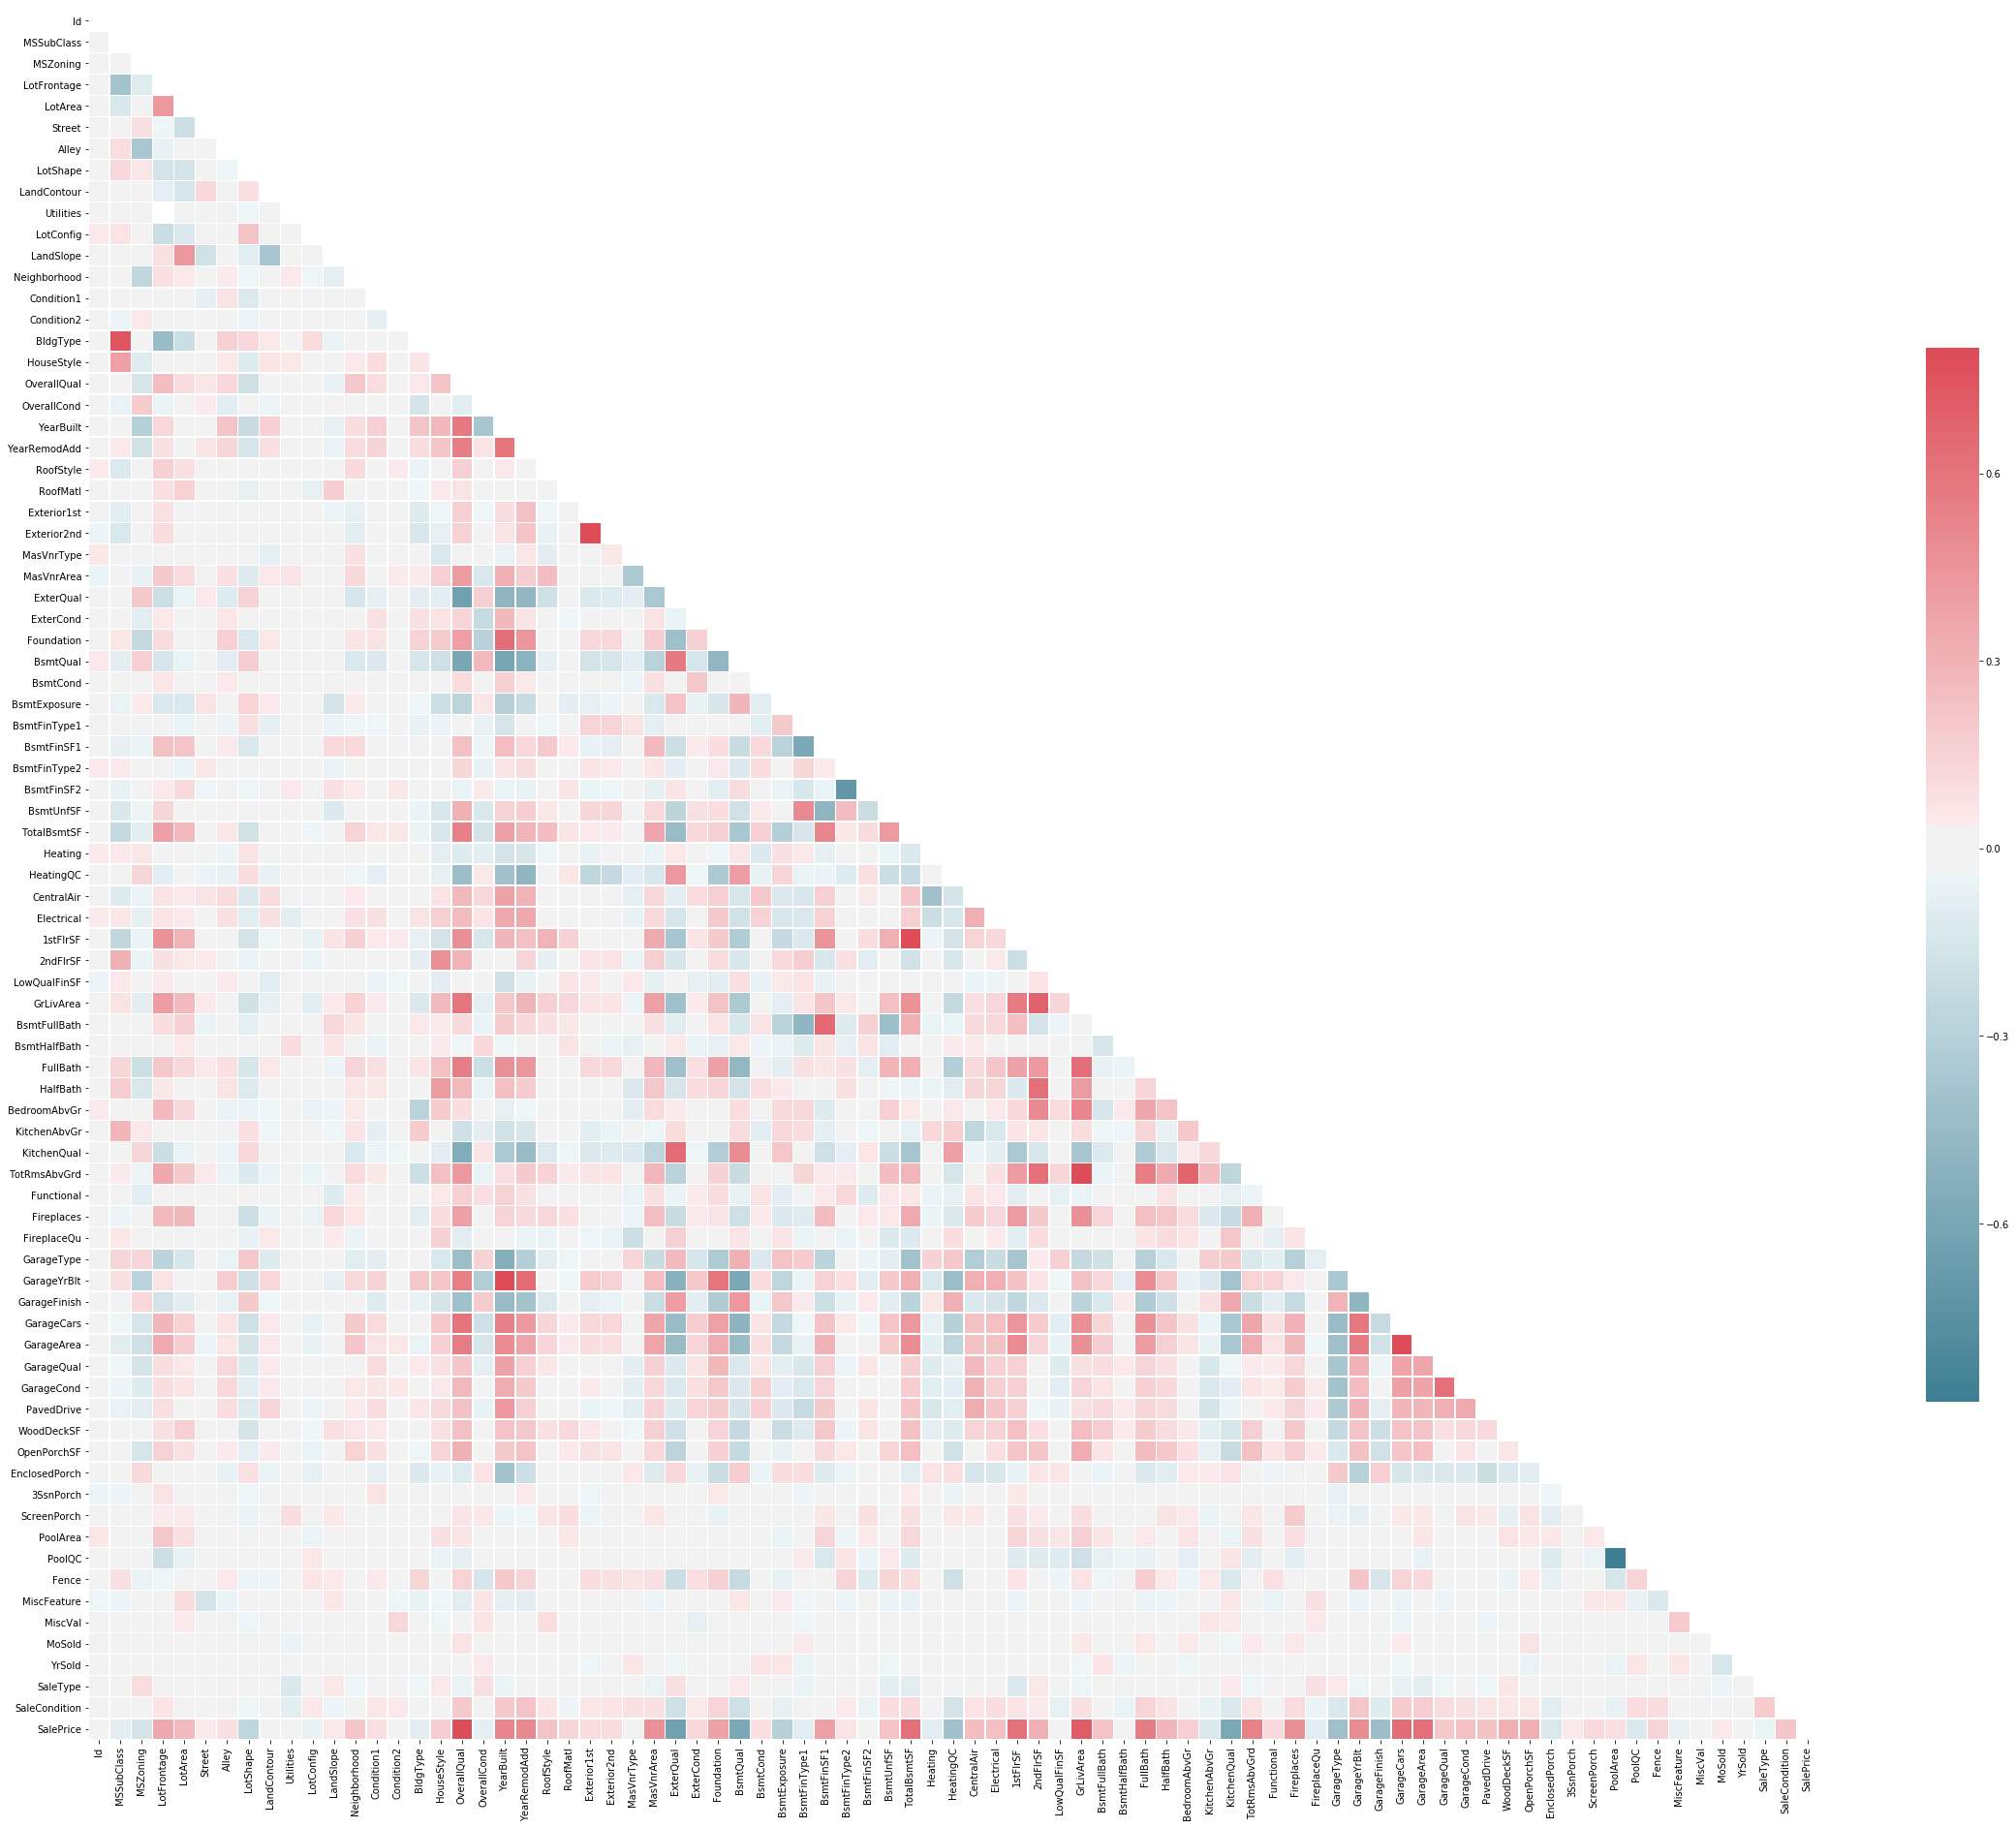

In [5]:
for x in catagorical_cols:
    label = preprocessing.LabelEncoder()
    train[x] = label.fit_transform(train[x])
#corrmat = train.corr()
#f, ax = plt.subplots(figsize=(200, 200))
#sns.heatmap(corrmat, vmax=0.8, square=True)

corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
train['CarPerArea']=train['GarageArea']/train['GarageCars']
train['CarPerArea']=train['CarPerArea'].fillna(0)

In [4]:
train['basementAnd1stFloorArea'] = train['1stFlrSF']+train['TotalBsmtSF']

In [5]:
cols =['SalePrice','OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
train[cols].isnull().sum()

SalePrice                  0
OverallQual                0
GrLivArea                  0
CarPerArea                 0
basementAnd1stFloorArea    0
FullBath                   0
YearBuilt                  0
TotRmsAbvGrd               0
YearRemodAdd               0
dtype: int64

In [7]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import numpy as np

In [17]:
#cols =['OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
#X = train[cols].values.astype(np.float64)
train1 = train.drop('SalePrice',1)
X = train1
y = train['SalePrice']

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
y_train

array([174000, 145000, 215200, ..., 115000, 189950, 174000], dtype=int64)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').